**Importing the required libraries**

In [2]:
#basic data analysis libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Set viz parameters
sns.set_palette('viridis')
sns.set_style('white')
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Colab package
from google.colab import drive

#Scikit-Learn
#Importing the required classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

**Read data**

In [3]:
drive.mount('/drive')
df = pd.read_csv(r'/drive/My Drive/ThreatFabric_DataScience_Challenge/Train_Keystroke.csv')
df.head()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12,UserID
0,0,166,86,271,200,296,364,513,664,752,...,1501,1473,1629,1602,1831,1736,1924,1831,2035,73
1,0,72,196,270,315,417,544,616,694,761,...,1448,1529,1636,1736,1815,1969,2040,2185,2265,32
2,0,31,418,487,623,695,780,820,1239,1319,...,2591,2740,2783,2902,2951,3071,3119,3216,3263,61
3,0,1,1,45,146,201,386,473,594,681,...,1553,1665,1761,1939,2010,2170,2240,2426,2513,77
4,0,71,312,406,1829,1926,2063,2183,2160,2263,...,3208,3309,3431,3607,3783,3784,3911,3911,4058,24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   press-0     750 non-null    int64
 1   release-0   750 non-null    int64
 2   press-1     750 non-null    int64
 3   release-1   750 non-null    int64
 4   press-2     750 non-null    int64
 5   release-2   750 non-null    int64
 6   press-3     750 non-null    int64
 7   release-3   750 non-null    int64
 8   press-4     750 non-null    int64
 9   release-4   750 non-null    int64
 10  press-5     750 non-null    int64
 11  release-5   750 non-null    int64
 12  press-6     750 non-null    int64
 13  release-6   750 non-null    int64
 14  press-7     750 non-null    int64
 15  release-7   750 non-null    int64
 16  press-8     750 non-null    int64
 17  release-8   750 non-null    int64
 18  press-9     750 non-null    int64
 19  release-9   750 non-null    int64
 20  press-10    750 non-null    int6

---------------------------------------------------------------

There are 27 columns in the data 

- UserID: Unique user identifier

- press-*: Represents the initial depression of a key

- release-*: Represents the subsequent release of the key

----------------------------------------------

We can see that the data comprises of keystroke data from 110 users recorded when typing a 13-length constant string multiple times (6~7 times). 

The main objective of this task is to analyze this keystroke data and recognize the user depending on his/her typing pattern. Keystroke recognition is a behavioral biometric that can be used to authenticate users and add an extra layer of security. 

Using the keystroke data, we can extract different features, which can then be used to find a user's typing pattern and interesting insights which can help in authenticating the users. 

**Understanding the data** & **Data Cleaning**

In [5]:
df.describe()

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12,UserID
count,750.0,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000
mean,0.0,69.169333,193.836000,282.561333,381.290667,463.785333,630.681333,724.353333,797.701333,883.377333,...,1783.097333,1885.537333,1984.321333,2103.289333,2204.482667,2283.165333,2376.960000,2502.622667,2598.18000,55.390667
std,0.0,36.846767,123.342862,133.368551,255.061088,257.774066,374.011928,377.488690,417.233448,419.989068,...,669.019083,739.839849,740.518510,807.496719,807.156205,864.822796,865.151679,914.644485,914.35089,31.669280
min,0.0,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,4.000000,14.000000,83.000000,...,763.000000,793.000000,924.000000,891.000000,1028.000000,955.000000,1055.000000,1124.000000,1188.00000,1.000000
25%,0.0,49.000000,152.000000,232.000000,281.000000,370.000000,464.000000,560.250000,593.000000,676.000000,...,1378.000000,1440.000000,1537.500000,1594.500000,1708.000000,1748.000000,1836.500000,1936.000000,2037.00000,28.000000
50%,0.0,72.000000,192.000000,279.000000,358.500000,436.000000,569.000000,663.000000,721.500000,807.000000,...,1632.500000,1704.000000,1802.000000,1899.500000,2001.000000,2065.000000,2157.500000,2256.000000,2354.00000,55.000000
75%,0.0,93.750000,232.000000,329.750000,424.000000,502.750000,711.750000,805.750000,895.500000,982.500000,...,2014.000000,2148.000000,2258.750000,2391.750000,2493.250000,2591.750000,2687.750000,2824.000000,2915.50000,82.750000
max,0.0,241.000000,1287.000000,1343.000000,4333.000000,4453.000000,4823.000000,4890.000000,5191.000000,5263.000000,...,7471.000000,7663.000000,7753.000000,8006.000000,8063.000000,8189.000000,8259.000000,8422.000000,8487.00000,110.000000


In [6]:
print("Number of rows: ",df.shape[0],"\nNumber of columns: ",df.shape[1])

Number of rows:  750 
Number of columns:  27


We have press and release timings for the 13 letters and the last column refers to the user ID. 

In [7]:
#let's see the number of null values for each column
df.isnull().sum().sort_values(ascending=False)

press-0       0
press-7       0
release-12    0
press-12      0
release-11    0
press-11      0
release-10    0
press-10      0
release-9     0
press-9       0
release-8     0
press-8       0
release-7     0
release-6     0
release-0     0
press-6       0
release-5     0
press-5       0
release-4     0
press-4       0
release-3     0
press-3       0
release-2     0
press-2       0
release-1     0
press-1       0
UserID        0
dtype: int64

In [8]:
#Let's make sure we have 110 number of users
print("Number of users: ", df.UserID.nunique())

Number of users:  110


**Feature Engineering**

---------------------
Let's try to extract some features from the keystroke timings which would be helpful in building our models. 


Considering 2 consecutive keys pressed (key1-down, key1-up, key2-down, key2-up), we can extract 4 different classes of keystroke latencies: 

1. Down-Up (DU) : The time between key:n press and key:n release
2. Up-Down (UD) : The time between key:n release and the next (key:n+1) press
3. Down-Down (DD) : The time between consecutive presses (key:n and key:n+1)
4. Up-Up (UU) : The time between consecutive releases (key:n and key:n+1)

In [9]:
#As there is keystroke data for 13 keys
for i in range(13):
  df['DU-'+str(i)] = df['press-'+str(i)] - df['release-'+str(i)]

for i in range(12):
  df['UD-'+str(i)] = df['press-'+str(i+1)] - df['release-'+str(i)]
  df['DD-'+str(i)] = df['press-'+str(i+1)] - df['press-'+str(i)]
  df['UU-'+str(i)] = df['release-'+str(i+1)] - df['release-'+str(i)]

In [10]:
df

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,UU-8,UD-9,DD-9,UU-9,UD-10,DD-10,UU-10,UD-11,DD-11,UU-11
0,0,166,86,271,200,296,364,513,664,752,...,128,-27,129,202,-95,134,93,-93,95,111
1,0,72,196,270,315,417,544,616,694,761,...,188,100,207,179,154,233,225,145,216,225
2,0,31,418,487,623,695,780,820,1239,1319,...,192,119,162,168,120,169,168,97,145,144
3,0,1,1,45,146,201,386,473,594,681,...,208,178,274,249,160,231,230,186,256,273
4,0,71,312,406,1829,1926,2063,2183,2160,2263,...,223,176,298,352,1,177,128,0,127,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,69,217,303,453,525,574,689,663,817,...,195,141,239,224,-32,51,74,128,234,196
746,0,121,258,547,472,669,669,767,833,955,...,143,49,133,161,100,212,167,121,188,192
747,0,35,795,880,959,1027,1339,1399,1531,1603,...,120,125,167,168,53,96,96,136,179,176
748,0,59,175,285,368,444,514,600,673,767,...,269,37,194,130,68,161,135,172,239,242


As DD = DU + UD, the time between consecutive presses is equal to the sum of  the times (n) press to release and then (n+1) release to press. As DD and UD are linearly related, let's confirm the linear dependency with a scatterplot

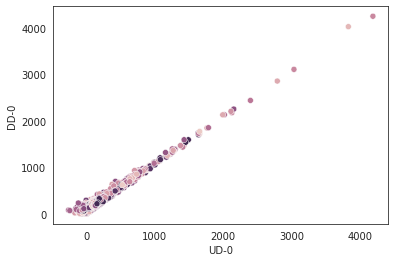

In [11]:
for i in range(12):
    ax = sns.scatterplot(x='UD-'+str(i),y='DD-'+str(i),hue='UserID',data=df)

plt.legend([],[], frameon=False)
sns.set(rc={'figure.figsize':(25,20)})

Let's use the violin plot from seaborn to plot the distribution of the 4 latencies considered to understand the distribution. We can also plot the swarmplot to understand the distribution, but to also visualize the kernel density plot, let's use violinplot. 

(As there are 110 users, let's consider the first 10 users)

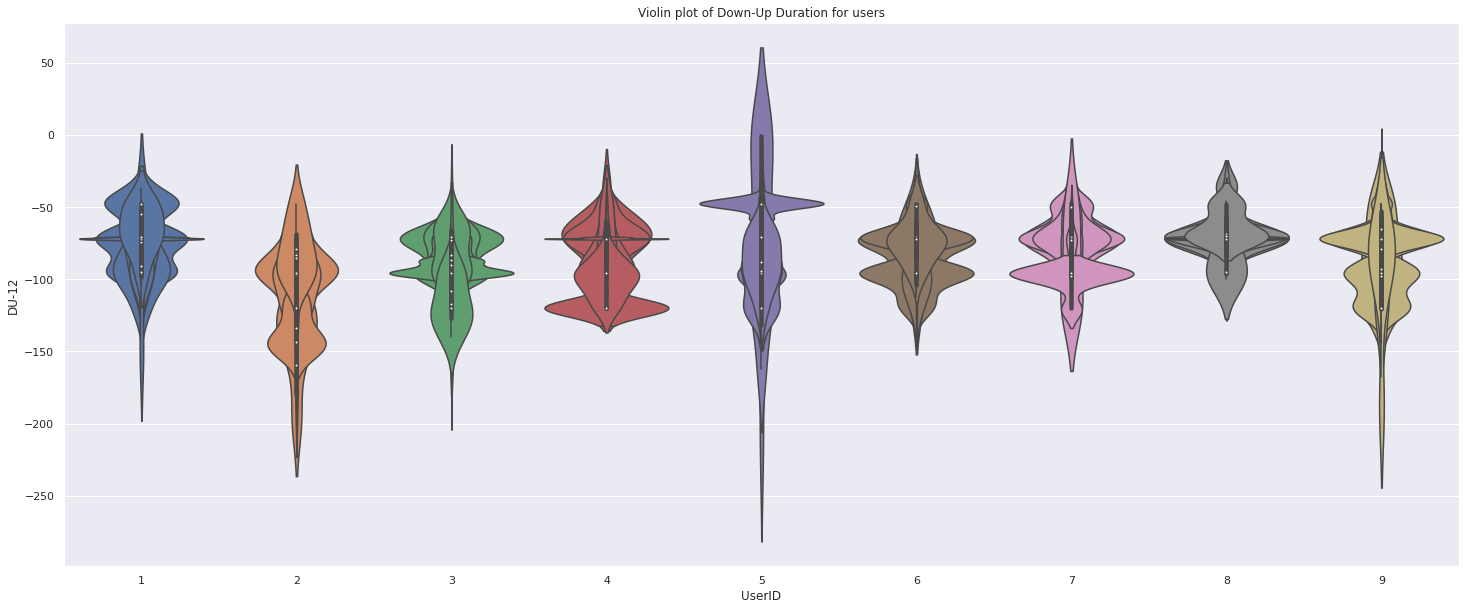

In [12]:
plt.figure(figsize=(25,10))
for i in range(13):
    sns.violinplot(y='DU-'+str(i),x='UserID',data=df[df.UserID < 10]).set_title('Violin plot of Down-Up Duration for users')

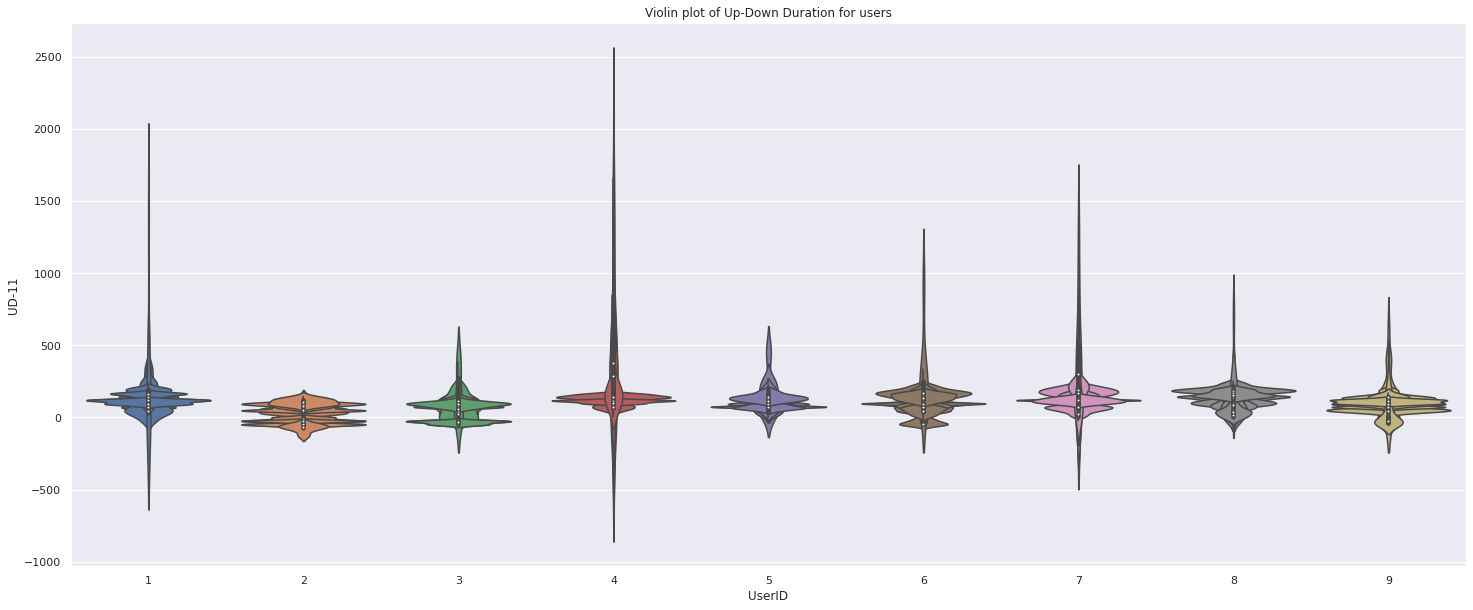

In [13]:
plt.figure(figsize=(25,10))
for i in range(12):
    sns.violinplot(y='UD-'+str(i),x='UserID',data=df[df.UserID < 10]).set_title('Violin plot of Up-Down Duration for users')

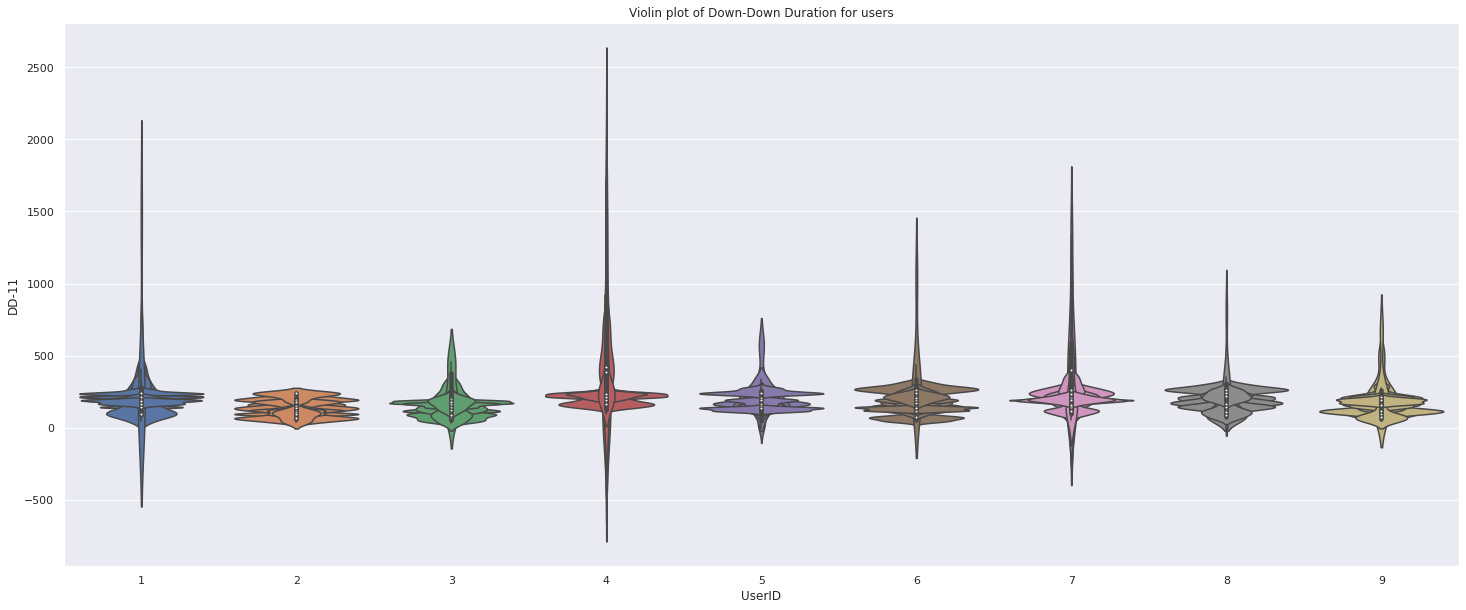

In [14]:
plt.figure(figsize=(25,10))
for i in range(12):
    sns.violinplot(y='DD-'+str(i),x='UserID',data=df[df.UserID < 10]).set_title('Violin plot of Down-Down Duration for users')

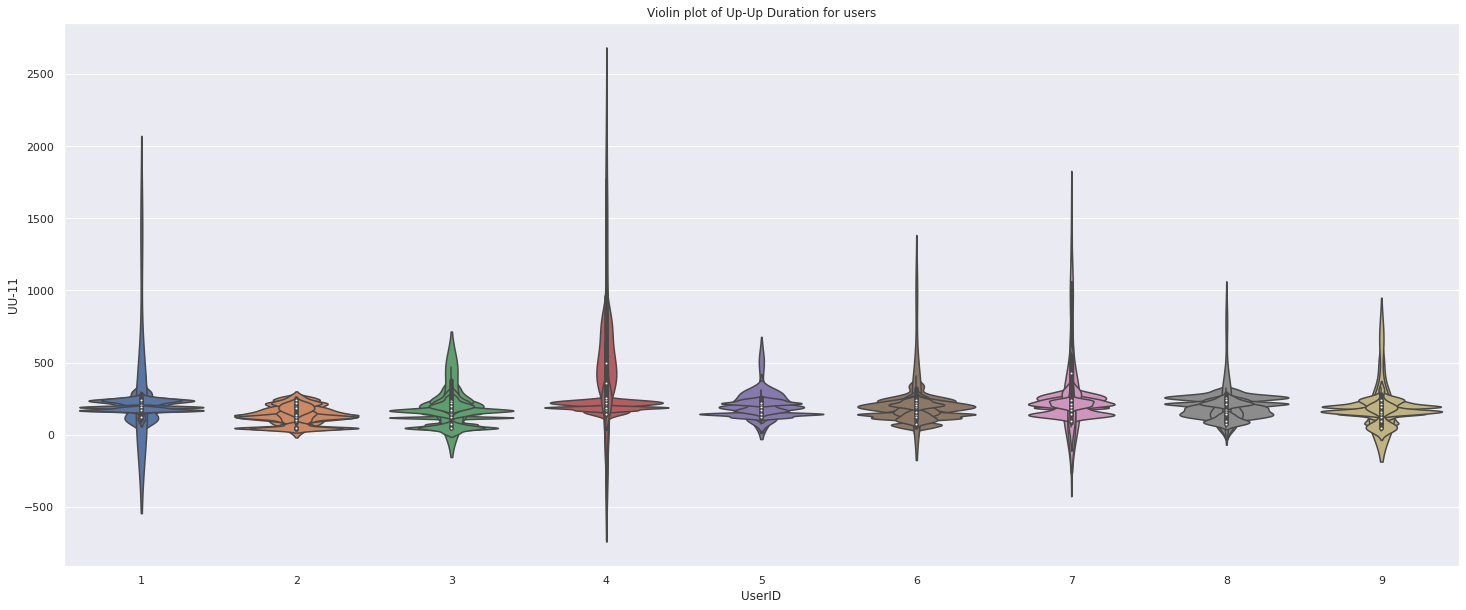

In [15]:
plt.figure(figsize=(25,10))
for i in range(12):
    sns.violinplot(y='UU-'+str(i),x='UserID',data=df[df.UserID < 10]).set_title('Violin plot of Up-Up Duration for users')

From the above violin plots we can see that, the UD, DD and UU latency times are almost similar across the users, but the DU time is considerably different, which confirms the fact that each user has a different speed and this maybe an important factor in further identifying/authenticating the user.

Next, let's see the average keystroke latency for all the users 

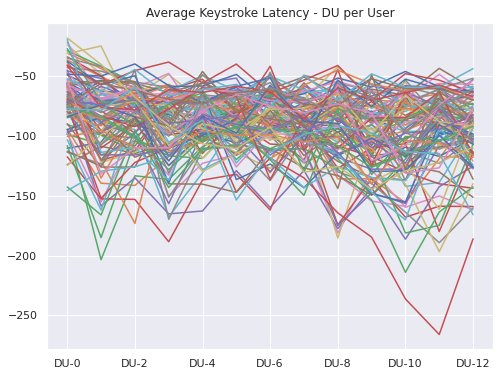

In [16]:
DU = [du for du in df.columns if du.startswith('DU')]
plot = df[DU]
plot['UserID'] = df['UserID'].values
plot = plot.groupby('UserID').mean()
plot.T.plot(figsize = (8,6), title= 'Average Keystroke Latency - DU per User')
plt.legend([],[], frameon=False)

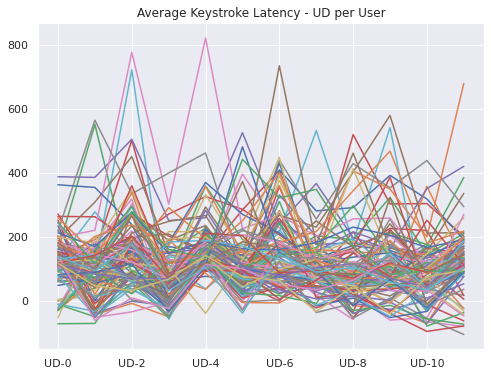

In [17]:
UD = [ud for ud in df.columns if ud.startswith('UD')]
plot = df[UD]
plot['UserID'] = df['UserID'].values
plot = plot.groupby('UserID').mean()
plot.T.plot(figsize = (8,6), title= 'Average Keystroke Latency - UD per User')
plt.legend([],[], frameon=False)

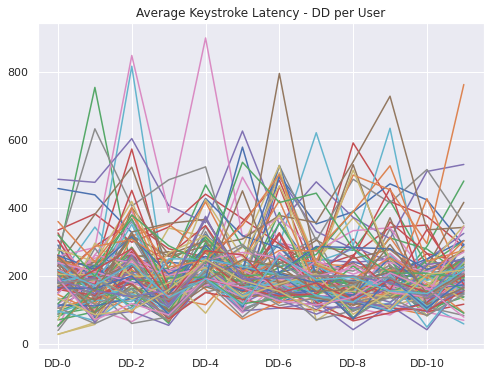

In [18]:
DD = [dd for dd in df.columns if dd.startswith('DD')]
plot = df[DD]
plot['UserID'] = df['UserID'].values
plot = plot.groupby('UserID').mean()
plot.T.plot(figsize = (8,6), title= 'Average Keystroke Latency - DD per User')
plt.legend([],[], frameon=False)

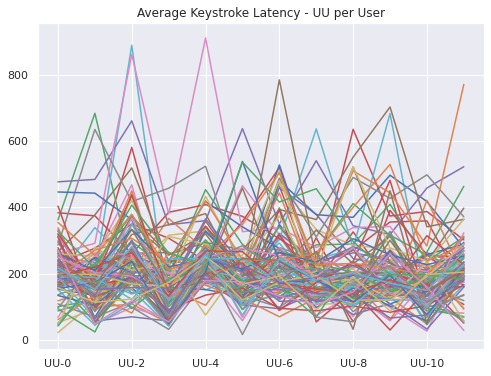

In [19]:
UU = [uu for uu in df.columns if uu.startswith('UU')]
plot = df[UU]
plot['UserID'] = df['UserID'].values
plot = plot.groupby('UserID').mean()
plot.T.plot(figsize = (8,6), title= 'Average Keystroke Latency - UU per User')
plt.legend([],[], frameon=False)

Text(0.5, 1.0, 'Histogram of the DU Latency')

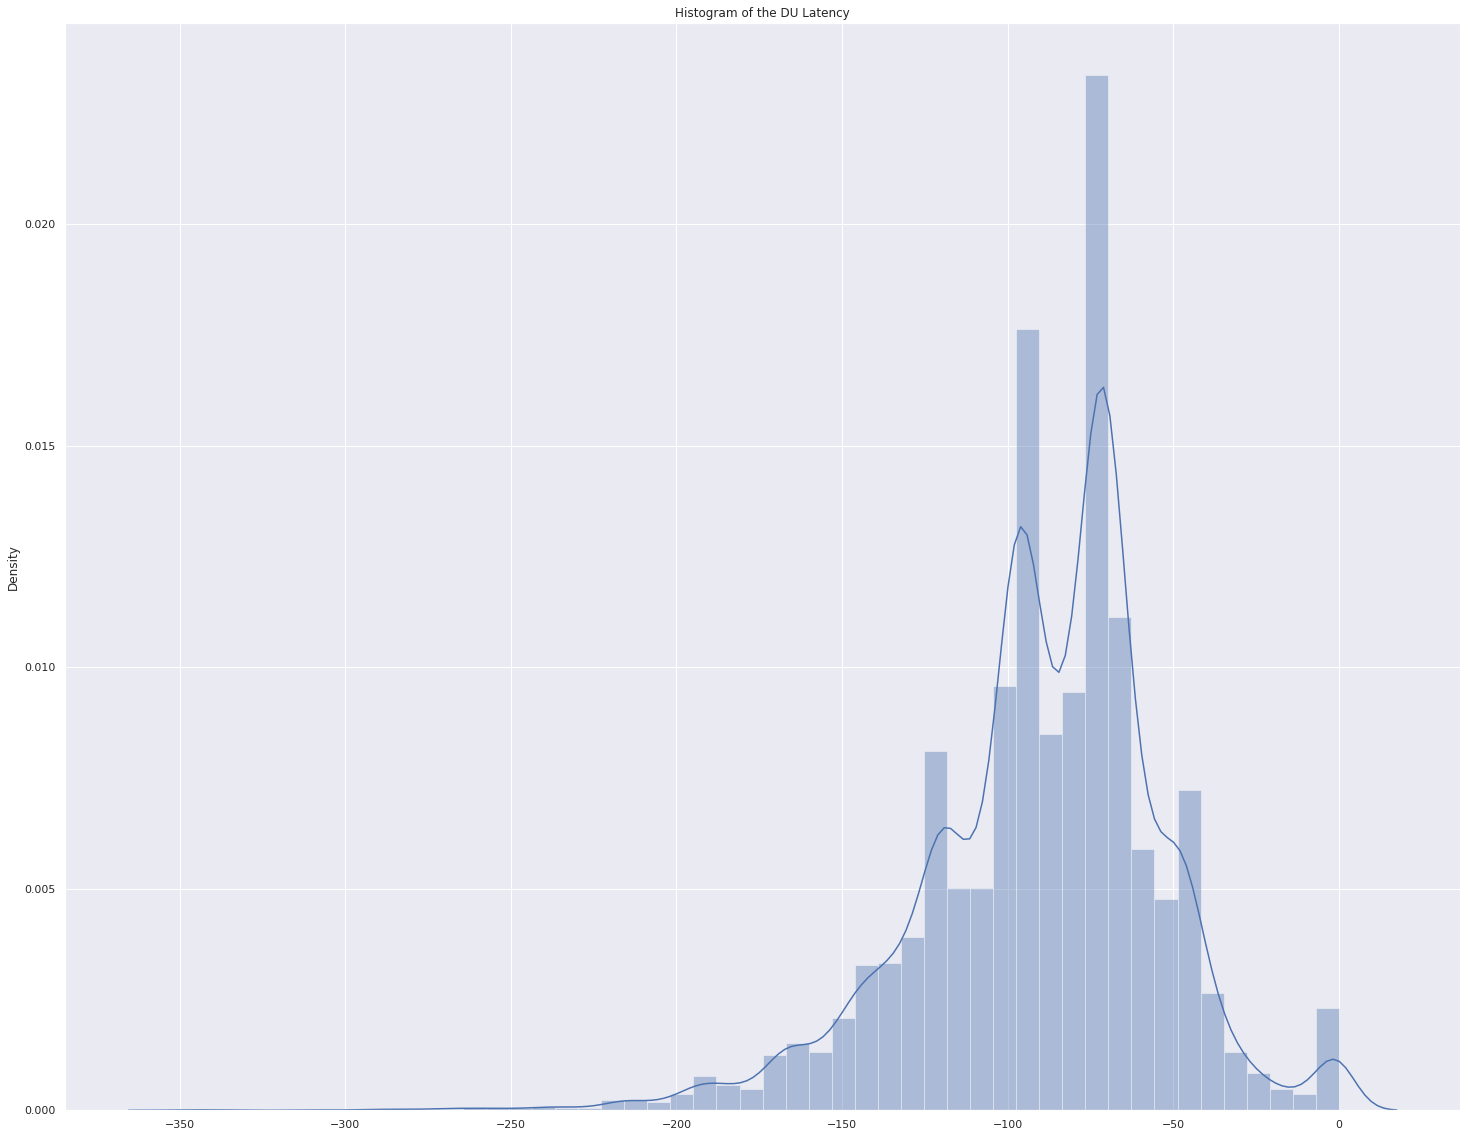

In [20]:
sns.distplot(df[DU],hist=True).set_title('Histogram of the DU Latency')

Text(0.5, 1.0, 'Histogram of the UD Latency')

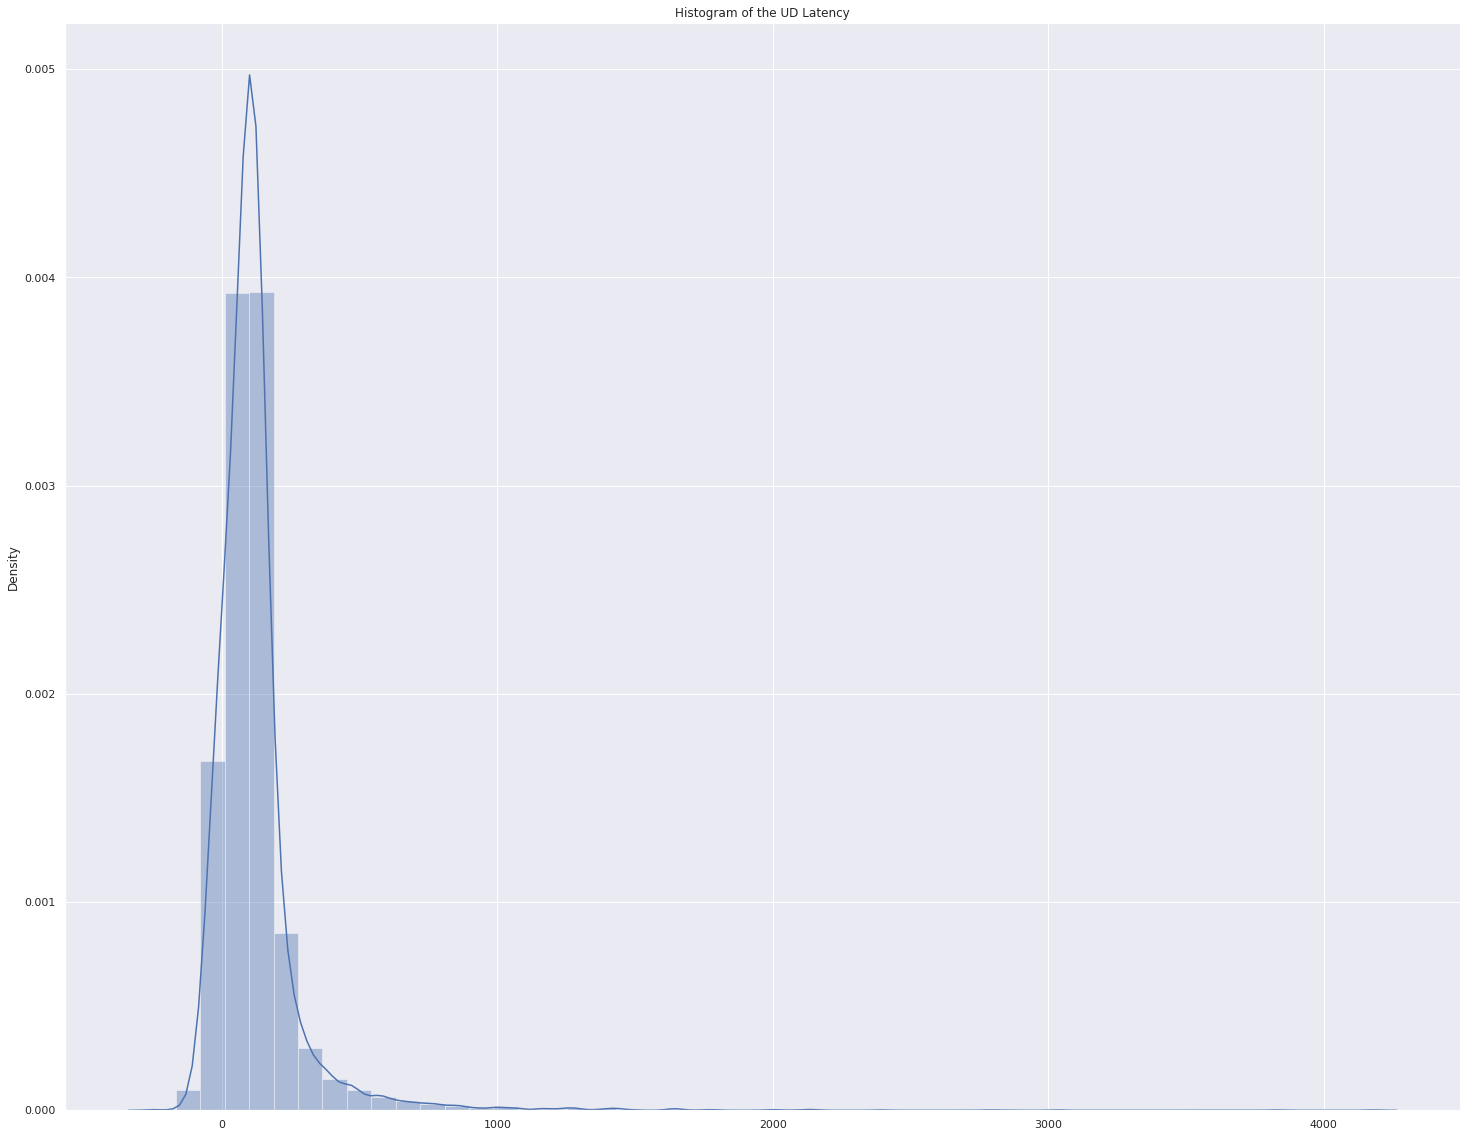

In [21]:
sns.distplot(df[UD],hist=True).set_title('Histogram of the UD Latency')

Text(0.5, 1.0, 'Histogram of the DD Latency')

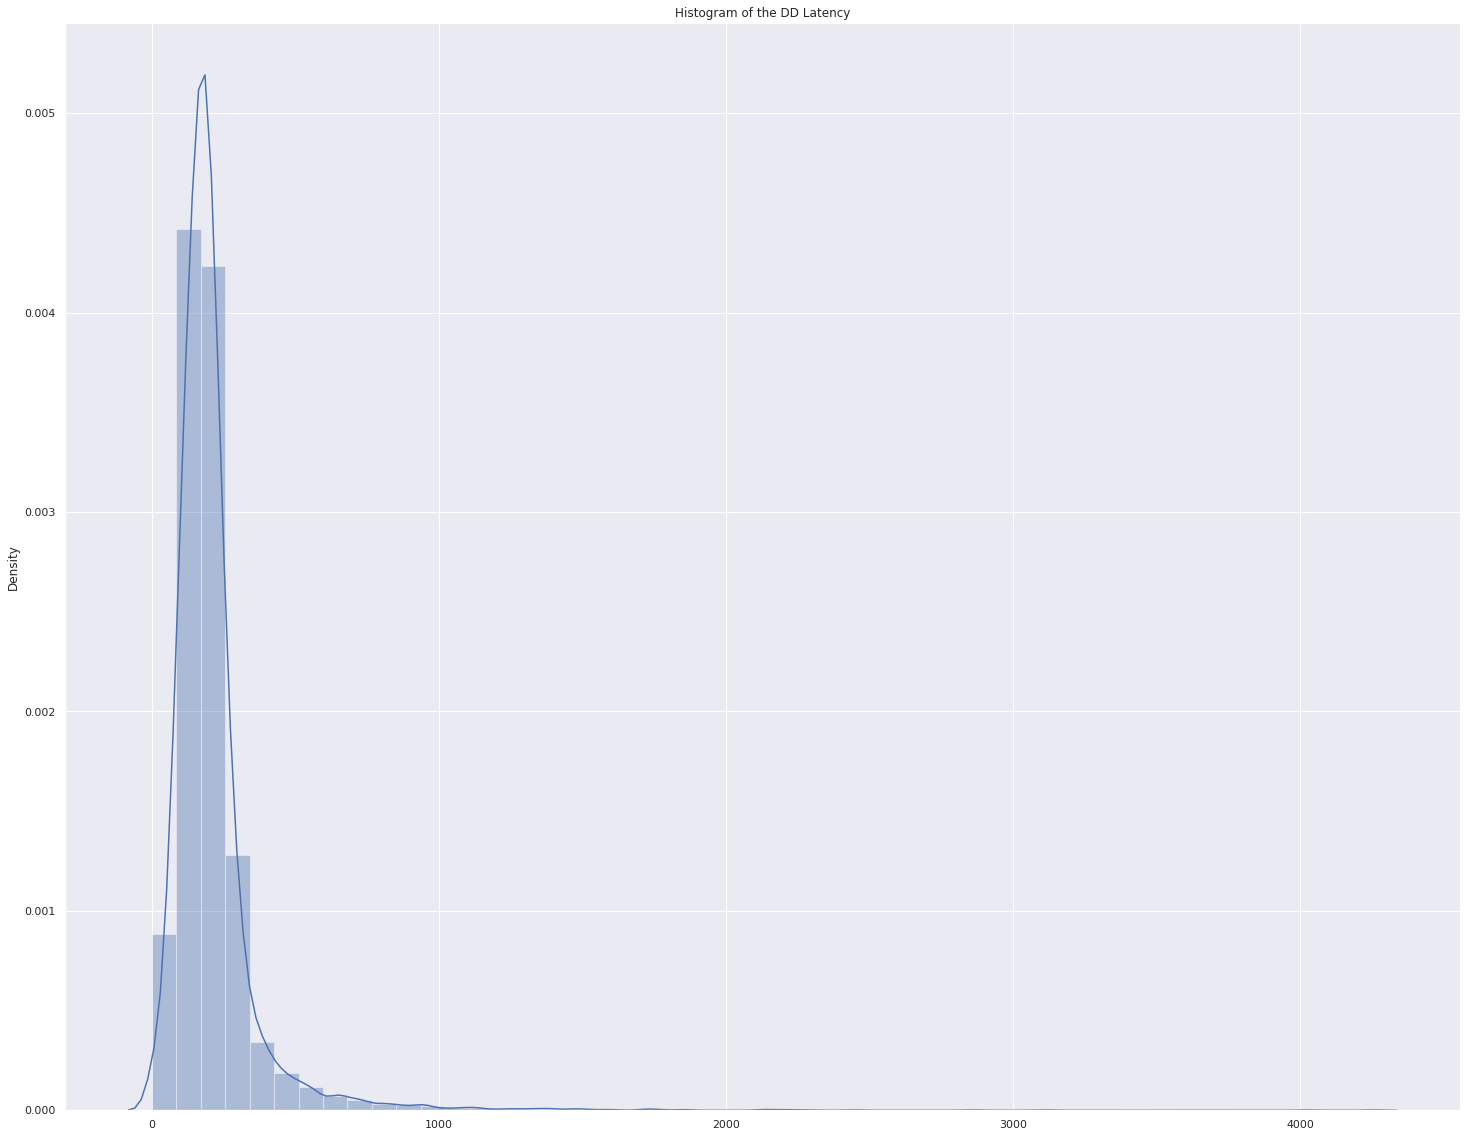

In [22]:
sns.distplot(df[DD],hist=True).set_title('Histogram of the DD Latency')

Text(0.5, 1.0, 'Histogram of the UU Latency')

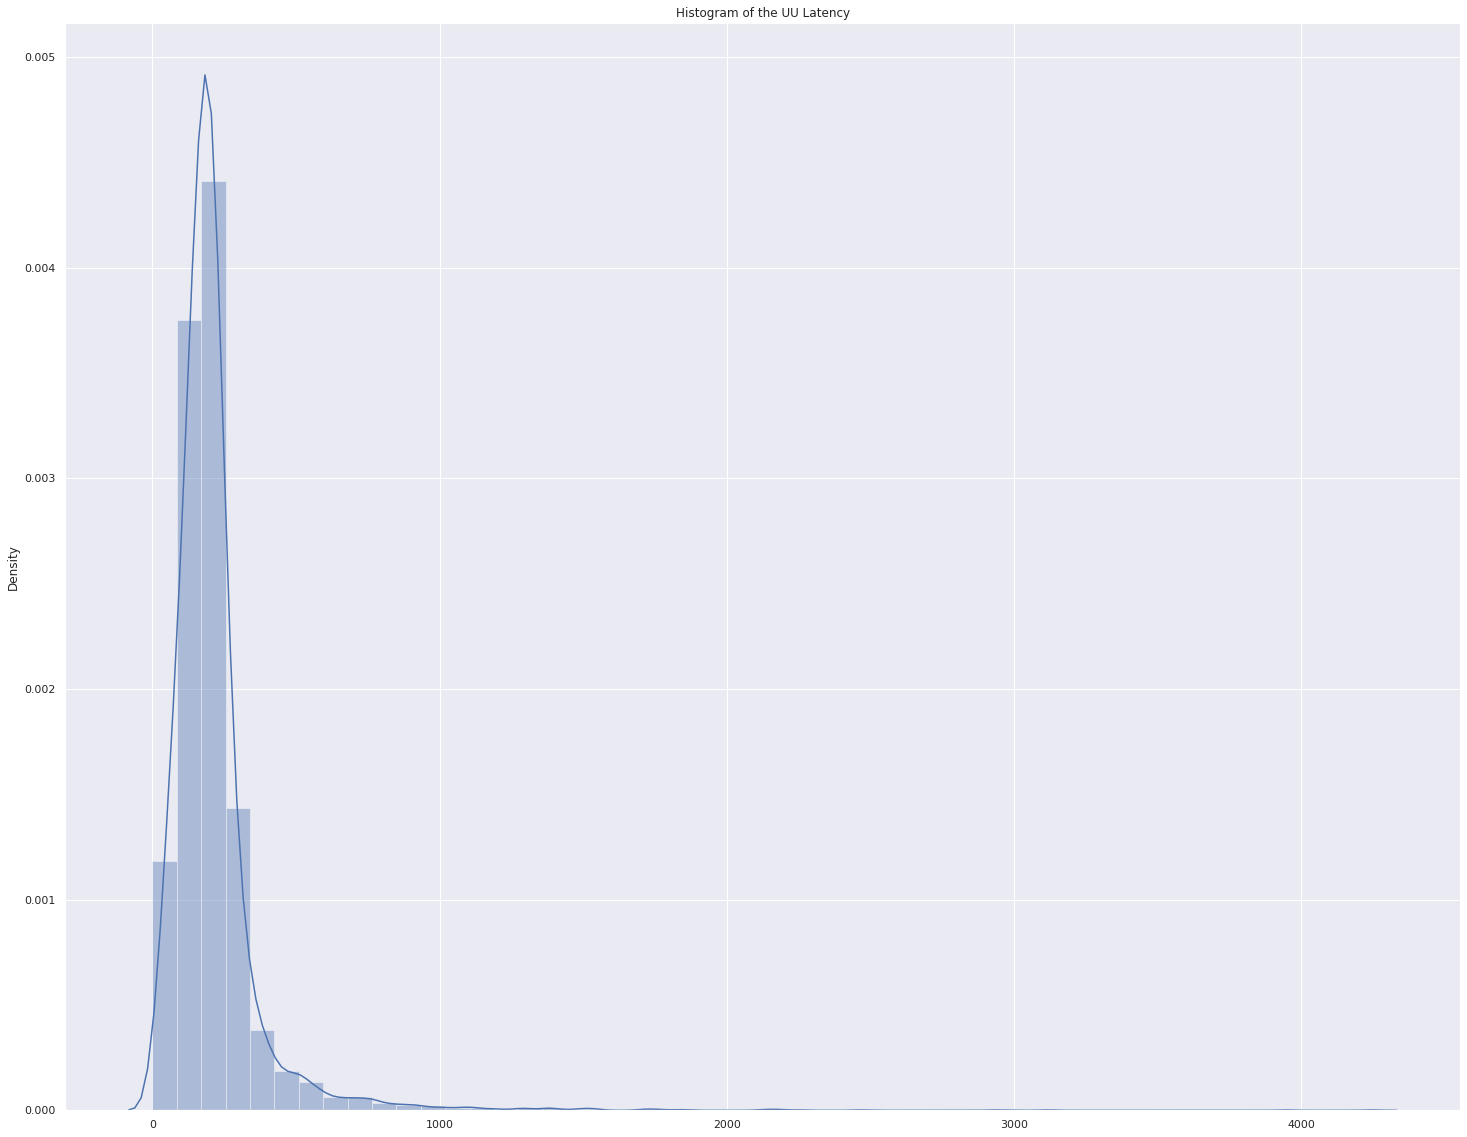

In [23]:
sns.distplot(df[UU],hist=True).set_title('Histogram of the UU Latency')

In [24]:
df.columns

Index(['press-0', 'release-0', 'press-1', 'release-1', 'press-2', 'release-2',
       'press-3', 'release-3', 'press-4', 'release-4', 'press-5', 'release-5',
       'press-6', 'release-6', 'press-7', 'release-7', 'press-8', 'release-8',
       'press-9', 'release-9', 'press-10', 'release-10', 'press-11',
       'release-11', 'press-12', 'release-12', 'UserID', 'DU-0', 'DU-1',
       'DU-2', 'DU-3', 'DU-4', 'DU-5', 'DU-6', 'DU-7', 'DU-8', 'DU-9', 'DU-10',
       'DU-11', 'DU-12', 'UD-0', 'DD-0', 'UU-0', 'UD-1', 'DD-1', 'UU-1',
       'UD-2', 'DD-2', 'UU-2', 'UD-3', 'DD-3', 'UU-3', 'UD-4', 'DD-4', 'UU-4',
       'UD-5', 'DD-5', 'UU-5', 'UD-6', 'DD-6', 'UU-6', 'UD-7', 'DD-7', 'UU-7',
       'UD-8', 'DD-8', 'UU-8', 'UD-9', 'DD-9', 'UU-9', 'UD-10', 'DD-10',
       'UU-10', 'UD-11', 'DD-11', 'UU-11'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5827b3f690>,
      dtype=object)

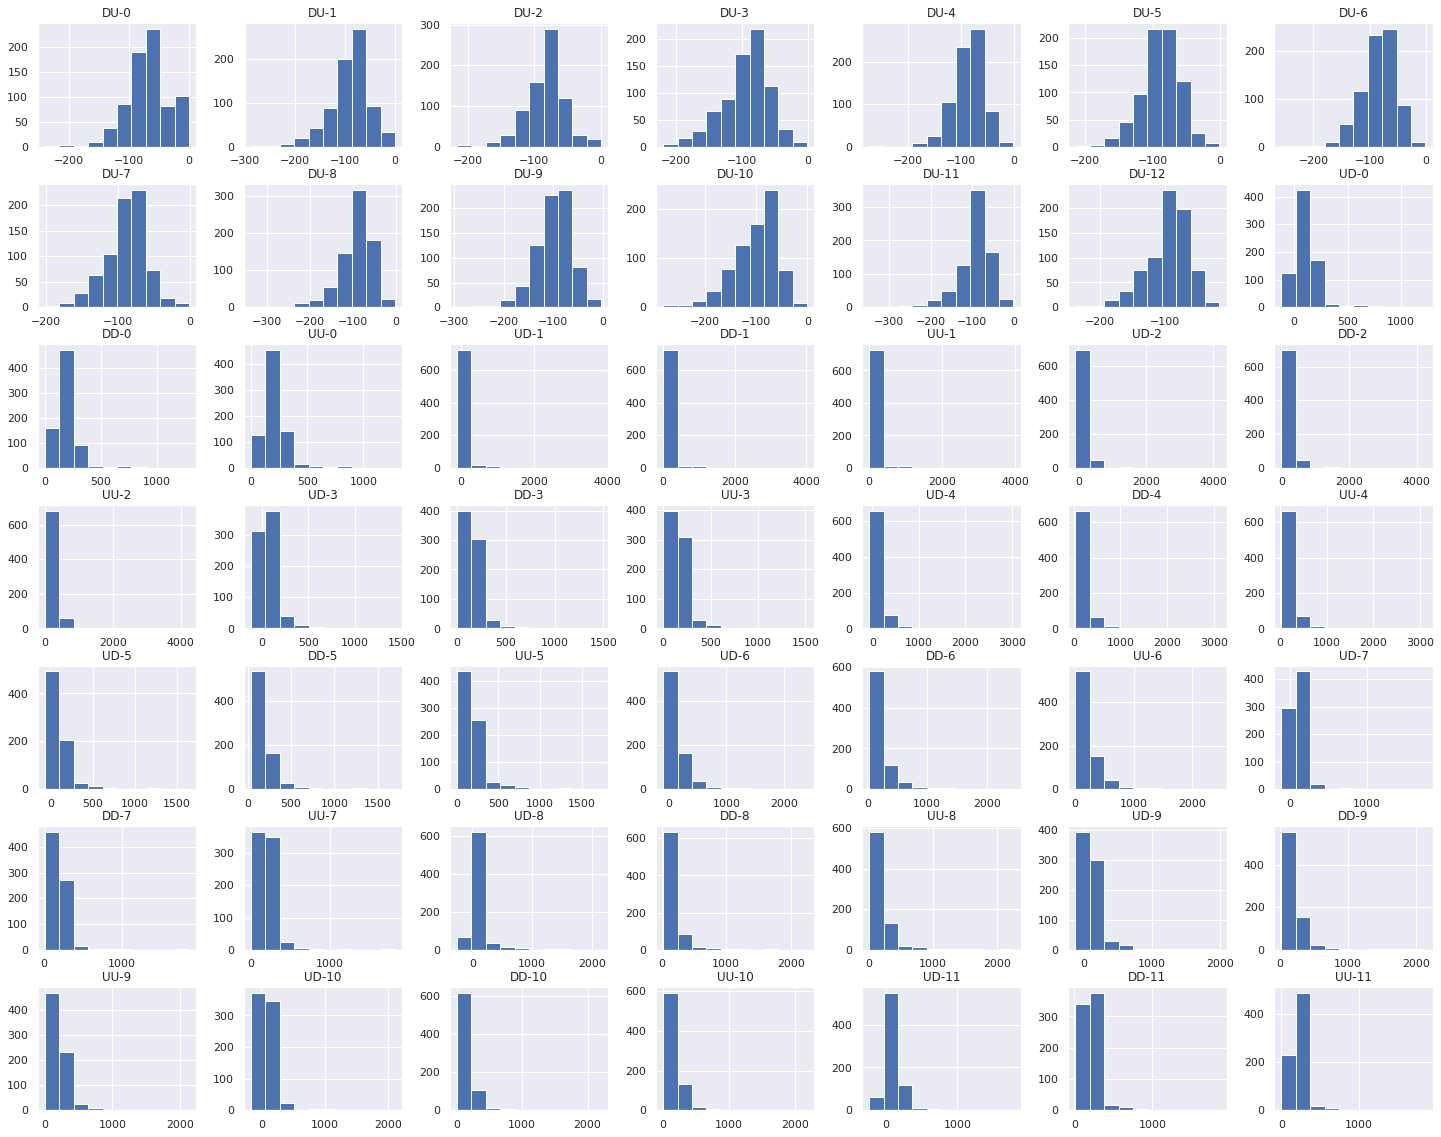

In [25]:
#Let's plot the distribution of all the latency columns 
df.iloc[:,27:].hist()

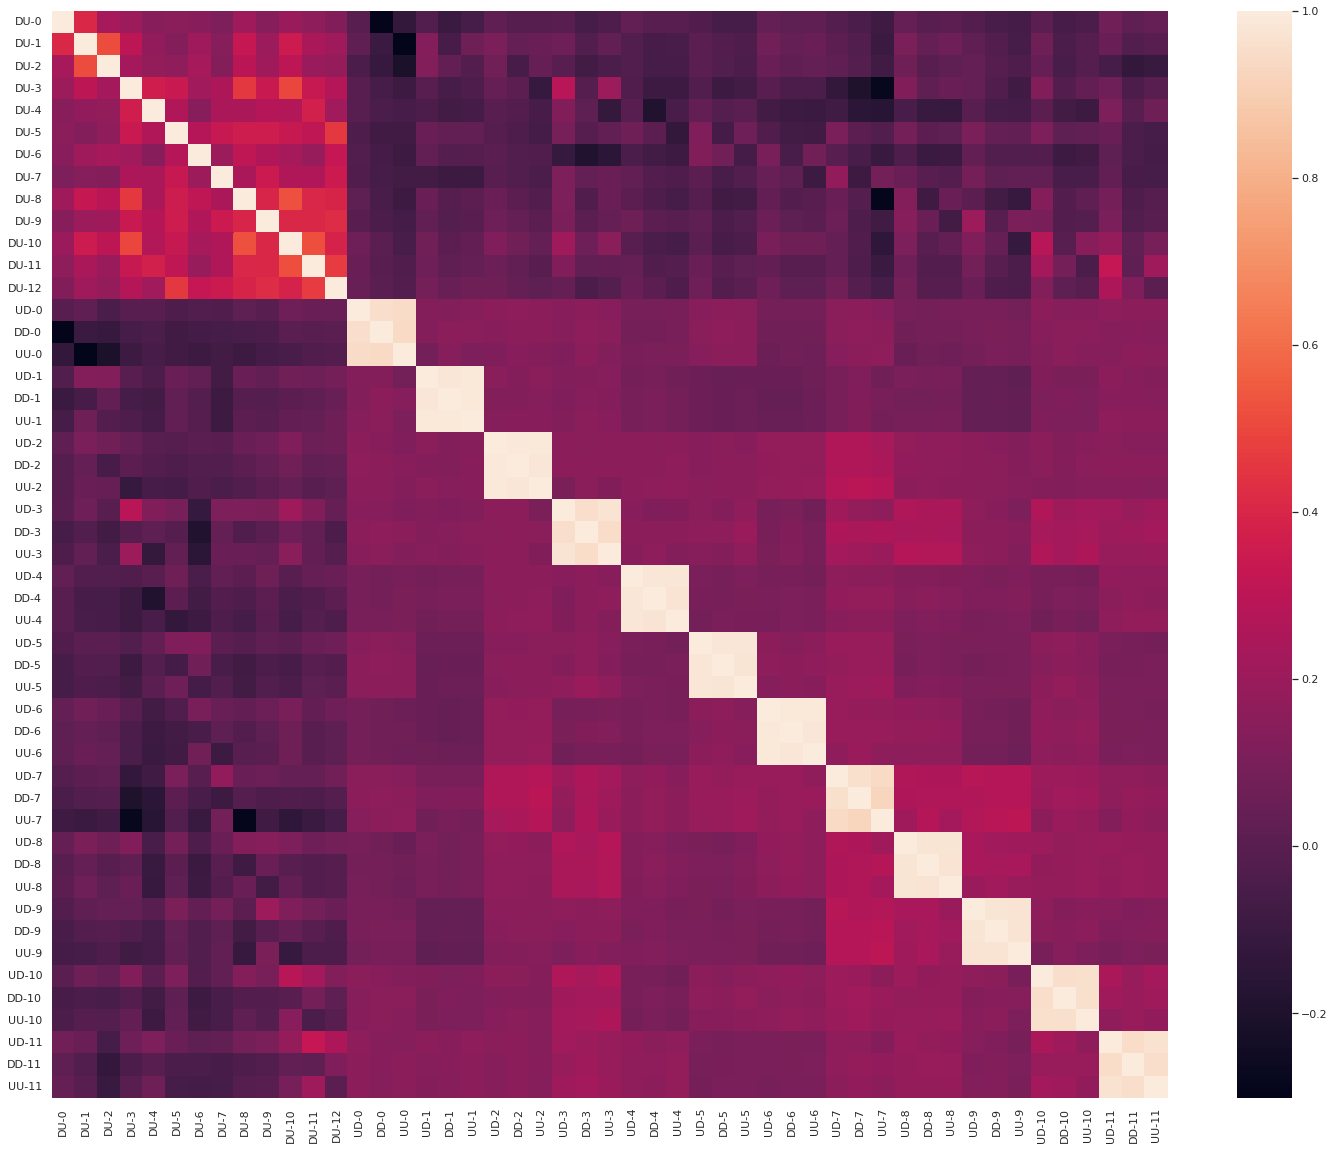

In [26]:
#Let's check how the different latencies for the different key presses are correlated
sns.heatmap(df.iloc[:,27:].corr())

In [27]:
df.iloc[:,26:].columns

Index(['UserID', 'DU-0', 'DU-1', 'DU-2', 'DU-3', 'DU-4', 'DU-5', 'DU-6',
       'DU-7', 'DU-8', 'DU-9', 'DU-10', 'DU-11', 'DU-12', 'UD-0', 'DD-0',
       'UU-0', 'UD-1', 'DD-1', 'UU-1', 'UD-2', 'DD-2', 'UU-2', 'UD-3', 'DD-3',
       'UU-3', 'UD-4', 'DD-4', 'UU-4', 'UD-5', 'DD-5', 'UU-5', 'UD-6', 'DD-6',
       'UU-6', 'UD-7', 'DD-7', 'UU-7', 'UD-8', 'DD-8', 'UU-8', 'UD-9', 'DD-9',
       'UU-9', 'UD-10', 'DD-10', 'UU-10', 'UD-11', 'DD-11', 'UU-11'],
      dtype='object')

Modelling

In [28]:
#Let's consider the created latency columns for building our model
dfFinal = df.iloc[:,26:]
dfFinal.head()

,UserID,DU-0,DU-1,DU-2,DU-3,DU-4,DU-5,DU-6,DU-7,DU-8,...,UU-8,UD-9,DD-9,UU-9,UD-10,DD-10,UU-10,UD-11,DD-11,UU-11
0,73,-166,-185,-96,-149,-88,-114,-119,-100,-133,...,128,-27,129,202,-95,134,93,-93,95,111
1,32,-72,-74,-102,-72,-67,-73,-88,-79,-34,...,188,100,207,179,154,233,225,145,216,225
2,61,-31,-69,-72,-40,-80,-73,-72,-48,-40,...,192,119,162,168,120,169,168,97,145,144
3,77,-1,-44,-55,-87,-87,-102,-69,-98,-95,...,208,178,274,249,160,231,230,186,256,273
4,24,-71,-94,-97,-120,-103,-98,-67,-115,-129,...,223,176,298,352,1,177,128,0,127,147


In [29]:
y = dfFinal['UserID']
X = dfFinal.drop(['UserID'], axis = 1)
#Train test split to test the accuracy of the built models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99) 

In [30]:
#size of the models
print('The train-set size is: ', X_train.shape, y_train.shape)
print('The test-set size is: ', X_test.shape, y_test.shape)

The train-set size is:  (562, 49) (562,)
The test-set size is:  (188, 49) (188,)


Lets build various models to understand the best algorithms that works with our data

Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy: ' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         2
           8       0.50      1.00      0.67         1
          10       0.50      1.00      0.67         1
          11       0.33      0.50      0.40         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.50      1.00      0.67         1
          17       1.00      1.00      1.00         2
          18       0.00      0.00      0.00         0
          19    

Decision Tree Classifier


In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy: ' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         3
           6       0.14      0.50      0.22         2
           7       0.50      0.50      0.50         2
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         0
          10       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          14       0.50      1.00      0.67         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.50      1.00      0.67         2
          18    

MLP Classifier

In [33]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('Accuracy: ' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.67      1.00      0.80         2
          18    

KNN Classifier

In [34]:
knn = neighbors.KNeighborsClassifier(n_jobs = 3, p = 1, n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy: ' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.20      1.00      0.33         1
           3       0.33      1.00      0.50         1
           4       0.25      0.50      0.33         2
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.14      0.50      0.22         2
           8       0.17      1.00      0.29         1
           9       0.00      0.00      0.00         0
          10       0.50      1.00      0.67         1
          11       0.67      1.00      0.80         2
          12       0.33      1.00      0.50         2
          13       0.33      1.00      0.50         1
          14       0.20      1.00      0.33         1
          15       0.00      0.00      0.00         1
          16       0.33      1.00      0.50         1
          17       1.00      1.00      1.00         2
          18    

Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Accuracy: %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7180851063829787
              precision    recall  f1-score   support

           1       0.20      1.00      0.33         1
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         2
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       0.50      0.50      0.50         2
           8       0.20      1.00      0.33         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       0.50      1.00      0.67         1
          14       1.00      1.00      1.00         1
          15       0.50      1.00      0.67         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          19       0.50      0.50      0.50         

XGBoost Classifier

In [36]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print('Accuracy: ' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       0.50      1.00      0.67         1
           3       0.50      1.00      0.67         1
           4       0.50      1.00      0.67         2
           5       0.25      0.33      0.29         3
           6       0.67      1.00      0.80         2
           7       0.33      0.50      0.40         2
           8       0.33      1.00      0.50         1
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         2
          12       0.67      1.00      0.80         2
          13       0.33      1.00      0.50         1
          14       0.33      1.00      0.50         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       1.00      0.50      0.67         2
          19       1.00      0.50      0.67         2
          20    

In [37]:
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=10,max_depth=5, objective= 'multi:softmax', num_class=y_train.nunique())
xgb1.fit(X_train,y_train)
y_pred = xgb1.predict(X_test)
print('Accuracy: ' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 
              precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.50      0.50      0.50         2
           5       0.50      0.33      0.40         3
           6       0.50      1.00      0.67         2
           7       0.50      0.50      0.50         2
           8       0.20      1.00      0.33         1
           9       0.00      0.00      0.00         0
          10       0.33      1.00      0.50         1
          11       0.00      0.00      0.00         2
          12       0.50      1.00      0.67         2
          13       0.50      1.00      0.67         1
          14       0.17      1.00      0.29         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       1.00      0.50      0.67         2
          18    

Let's try using GridSearchCV to find the best hyperparameters for the Random Forest model as it has the best performance in the considered models

In [39]:
rfCV = RandomForestClassifier(random_state = 99)
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfCV, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [46]:
gridF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [50]:
optimizedRF = RandomForestClassifier(random_state=99, max_depth = 25,min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1200)
optimizedRF.fit(X_train, y_train)
y_pred = optimizedRF.predict(X_test)
print('Accuracy: %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.75
              precision    recall  f1-score   support

           1       0.20      1.00      0.33         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.67      1.00      0.80         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       0.33      0.50      0.40         2
           8       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       0.50      1.00      0.67         1
          15       0.50      1.00      0.67         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          18       0.00      0.00      0.00         0
          19

In [61]:
final_model = optimizedRF
dfToPredict = pd.read_csv(r'/drive/My Drive/ThreatFabric_DataScience_Challenge/Test_Keystroke.csv')
dfResult = dfToPredict.copy()

In [62]:
for i in range(13):
  dfToPredict['DU-'+str(i)] = dfToPredict['press-'+str(i)] - dfToPredict['release-'+str(i)]

for i in range(12):
  dfToPredict['UD-'+str(i)] = dfToPredict['press-'+str(i+1)] - dfToPredict['release-'+str(i)]
  dfToPredict['DD-'+str(i)] = dfToPredict['press-'+str(i+1)] - dfToPredict['press-'+str(i)]
  dfToPredict['UU-'+str(i)] = dfToPredict['release-'+str(i+1)] - dfToPredict['release-'+str(i)]

dfToPredict = dfToPredict.iloc[:,26:]


In [63]:
result = final_model.predict(dfToPredict)

In [64]:
result

array([ 45,   8,  93,  32, 101,  82,  19,  37,  90,  89,  67,  13,  60,
       103,   6,  45,  72,  87,  36, 107, 108,  54,  10,  89,  81,   2,
        70,  65,   1,  18,  68,  55,   8,  20,  25, 106,   5,  71,  54,
        30,  70,  37, 102, 105,  96, 108,  14,  16,  21, 110,   2,  56,
        84,  22,  43,  28,  57,  36, 108,  51,  44,  83,  88, 106,  38,
        71,  23,  83,  52,   4,   1,  15,  41,  88,  62,  31,  52,  85,
       109,  75,  33,  69,  87,  35,  66,  21,  43, 107, 105,  58,  18,
         9,  12,  98,  63,  77,  11,  26, 100,  76,  15,   9,  72,  43,
        66,  91,  53,  17,  86,  30,  23,  75, 100, 110,  99,   3,   4,
         2,  97,  34,  78,  50,  85,  92,  64,  94,  93,  98, 100,  39])

In [65]:
dfResult['UserID'] = result
dfResult.to_csv('/drive/My Drive/ThreatFabric_DataScience_Challenge/resultUserIDs.csv')

In [66]:
dfResult.to_csv('/drive/My Drive/ThreatFabric_DataScience_Challenge/resultUserIDs.csv')